In [ ]:
#For brazil account 2
import pandas as pd

# Load your data
df = pd.read_csv("/content/threeds_authentication_report_2024-12-01_2025-05-31-4.csv")  # replace with your actual file path

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

In [ ]:
 #Add helper columns
df['Challenge_Started'] = df['Authentication_Flow'] == 'Challenged'
df['Challenge_Completed'] = (df['Authentication_Flow'] == 'Challenged') & (df['Authentication_Success'] == 1)
df['Approved'] = df['Acquirer_Response'].str.lower() == 'approved'
df['Post_Challenge_Approved'] = df['Challenge_Completed'] & df['Approved']
df['ThreeDS_Triggered'] = df['Execute_3DS_from_Request'] == True




In [ ]:
filtered_df = df[df['ThreeDS_Triggered']]

In [ ]:
three_ds_triggered = filtered_df.shape[0]
three_ds_challenged = (filtered_df['Authentication_Flow'] == 'Challenged').sum()
challenge_completed = ((filtered_df['Authentication_Flow'] == 'Challenged') & (filtered_df['Authentication_Success'] == 1)).sum()
challenge_approved = (((filtered_df['Authentication_Flow'] == 'Challenged') &
                      (filtered_df['Authentication_Success'] == 1) &
                      (filtered_df['Acquirer_Response'].str.lower() == 'approved'))).sum()

In [ ]:
challenge_rate = (three_ds_challenged / three_ds_triggered) * 100
challenge_completion_rate = (challenge_completed / three_ds_challenged) * 100
post_challenge_approval_rate = (challenge_approved / challenge_completed) * 100
drop_off_rate = ((three_ds_challenged - challenge_completed) / three_ds_challenged) * 100


In [ ]:
#Print the values
{
    "3DS Triggered": three_ds_triggered,
    "Challenged": three_ds_challenged,
    "Challenge Completed": challenge_completed,
    "Challenge Approved": challenge_approved,
    "Challenge Rate (%)": round(challenge_rate, 2),
    "Challenge Completion Rate (%)": round(challenge_completion_rate, 2),
    "Post-Challenge Approval Rate (%)": round(post_challenge_approval_rate, 2),
    "Drop-off Rate (%)": round(drop_off_rate, 2)
}

{'3DS Triggered': 6433,
 'Challenged': np.int64(4861),
 'Challenge Completed': np.int64(2736),
 'Challenge Approved': np.int64(2514),
 'Challenge Rate (%)': np.float64(75.56),
 'Challenge Completion Rate (%)': np.float64(56.28),
 'Post-Challenge Approval Rate (%)': np.float64(91.89),
 'Drop-off Rate (%)': np.float64(43.72)}

In [ ]:
results = []

# Optional: clean Acquirer_Response column
df['Acquirer_Response'] = df['Acquirer_Response'].fillna("").astype(str)

for merchant in df['Merchant_Account'].unique():
    sub_df = df[df['Merchant_Account'] == merchant]
    filtered = sub_df[sub_df['Execute_3DS_from_Request'] == True]

    total_txns = sub_df.shape[0]
    triggered = filtered.shape[0]
    challenged = (filtered['Authentication_Flow'] == 'Challenged').sum()
    completed = ((filtered['Authentication_Flow'] == 'Challenged') & (filtered['Authentication_Success'] == 1)).sum()
    approved = ((filtered['Authentication_Flow'] == 'Challenged') &
                (filtered['Authentication_Success'] == 1) &
                (filtered['Acquirer_Response'].str.lower() == 'approved')).sum()

    result = {
        "Merchant": merchant,
        "Total Transactions": total_txns,
        "3DS Triggered": triggered,
        "Challenged": challenged,
        "Challenge Completed": completed,
        "Challenge Approved": approved,
        "3DS Triggered Rate (%)": round(triggered / total_txns * 100, 2) if total_txns else 0,
        "Challenge Rate (%)": round(challenged / triggered * 100, 2) if triggered else 0,
        "Challenge Completion Rate (%)": round(completed / challenged * 100, 2) if challenged else 0,
        "Post-Challenge Approval Rate (%)": round(approved / completed * 100, 2) if completed else 0,
        "Drop-off Rate (%)": round((challenged - completed) / challenged * 100, 2) if challenged else 0
    }
    results.append(result)

summary_df = pd.DataFrame(results)
print(summary_df)


                    Merchant  Total Transactions  3DS Triggered  Challenged  \
0  DistribusionTecnologia-WL                7922           6433        4861   

   Challenge Completed  Challenge Approved  3DS Triggered Rate (%)  \
0                 2736                2514                    81.2   

   Challenge Rate (%)  Challenge Completion Rate (%)  \
0               75.56                          56.28   

   Post-Challenge Approval Rate (%)  Drop-off Rate (%)  
0                             91.89              43.72  


In [ ]:
#account DistribusionTecnologia-WL

import pandas as pd

# Load your data
df = pd.read_csv("/content/merchant_multiday_dispute_report_2024-12-01_2025-05-31-4.csv")




In [ ]:
import pandas as pd

# Step 1: Load CSV file (update path)
file_path = "/content/merchant_multiday_dispute_report_2024-12-01_2025-05-31-4.csv"  # Replace with your actual CSV path
df_raw = pd.read_csv(file_path)

# Step 2: Preview columns if needed
# print(df_raw.columns)

# Step 3: Clean headers (normalize all column names)
df_raw.columns = (
    df_raw.columns.astype(str)
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("\n", "_")
    .str.replace("\r", "_")
)

# Optional: print normalized headers to check
# print(df_raw.columns.tolist())

# Step 4: Rename key columns (based on normalized names)
df = df_raw.rename(columns={
    'Merchant_Account': 'Merchant_Account',
    'Dispute_Amount': 'Dispute_Amount',
    'Dispute_Currency': 'Currency',
    'Record_Date': 'Record_Date',
    'Dispute_Reason': 'Reason_Code'
})

# Step 5: Convert data types
df['Dispute_Amount'] = pd.to_numeric(df['Dispute_Amount'], errors='coerce')
df['Record_Date'] = pd.to_datetime(df['Record_Date'], errors='coerce')

# Step 6: Drop rows missing key values
df = df.dropna(subset=['Dispute_Amount', 'Merchant_Account'])

# ---- Metrics Calculation ----
total_disputes = len(df)
fraud_related = df['Reason_Code'].str.contains("fraud", case=False, na=False).sum()
gross_fraud_loss = df[df['Reason_Code'].str.contains("fraud", case=False, na=False)]['Dispute_Amount'].sum()

# Step 7: Output results
dispute_summary = pd.DataFrame({
    'Metric': [
        'Total Chargebacks (Disputes)',
        'Fraud-Related Chargebacks (False Negatives)',
        'Gross Fraud Loss Amount'
    ],
    'Value': [
        total_disputes,
        fraud_related,
        round(gross_fraud_loss, 2)
    ]
})

print(dispute_summary)

                                        Metric    Value
0                 Total Chargebacks (Disputes)    32.00
1  Fraud-Related Chargebacks (False Negatives)    10.00
2                      Gross Fraud Loss Amount  6223.22


In [ ]:
import pandas as pd

# === Step 1: Load your CSV file ===
file_path = "/content/merchant_multiday_dispute_report_2024-12-01_2025-05-31-4.csv"  # change to your actual file name
df = pd.read_csv(file_path)

# === Step 2: Clean column names ===
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# === Step 3: Filter fraud-related chargebacks ===
fraud_disputes = df[df['Record_Type'].str.lower() == 'notificationoffraud']

# === Step 4: Convert Risk Score to numeric ===
fraud_disputes['Risk_Scoring'] = pd.to_numeric(fraud_disputes['Risk_Scoring'], errors='coerce')

# === Step 5: Calculate total fraud and low-score fraud cases ===
low_score_threshold = 50
total_fraud_cases = fraud_disputes.shape[0]
low_score_cases = fraud_disputes[fraud_disputes['Risk_Scoring'] < low_score_threshold].shape[0]

# === Step 6: Compute % of low-score fraud ===
low_score_rate = (low_score_cases / total_fraud_cases) * 100 if total_fraud_cases > 0 else 0

# === Step 7: Output summary ===
print("🔍 Fraud Scoring Model Analysis")
print(f"Total Fraud-Related Chargebacks: {total_fraud_cases}")
print(f"Low Score Fraud Approvals (<{low_score_threshold}): {low_score_cases}")
print(f"Low Score Fraud Rate: {low_score_rate:.2f}%")

🔍 Fraud Scoring Model Analysis
Total Fraud-Related Chargebacks: 11
Low Score Fraud Approvals (<50): 2
Low Score Fraud Rate: 18.18%


<ipython-input-13-228319514>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_disputes['Risk_Scoring'] = pd.to_numeric(fraud_disputes['Risk_Scoring'], errors='coerce')


In [ ]:
import pandas as pd

# Load your 3DS authentication dataset
df = pd.read_csv("/content/threeds_authentication_report_2024-12-01_2025-05-31-4.csv")  # Replace with actual path

# Normalize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Filter for and approved transactions
approved_txns = df[
    (df['Merchant_Account'] == 'DistribusionTecnologia-WL') &
    (df['Acquirer_Response'].str.lower() == 'approved')
]

# Count total approved transactions
total_approved = len(approved_txns)

print(f"Total approved transactions for DistribusionTecnologia : {total_approved}")

Total approved transactions for DistribusionTecnologia : 4190


In [ ]:
false_negatives = 10  # from dispute data
false_negative_rate = (false_negatives / total_approved) * 100

In [ ]:
# Create a summary table
summary = pd.DataFrame({
    'Metric': ['Total Approved Transactions', 'False Negatives', 'False Negative Rate (%)'],
    'Value': [total_approved, false_negatives, round(false_negative_rate, 4)]
})

summary

,Metric,Value
0,Total Approved Transactions,4190.0000
1,False Negatives,10.0000
2,False Negative Rate (%),0.2387


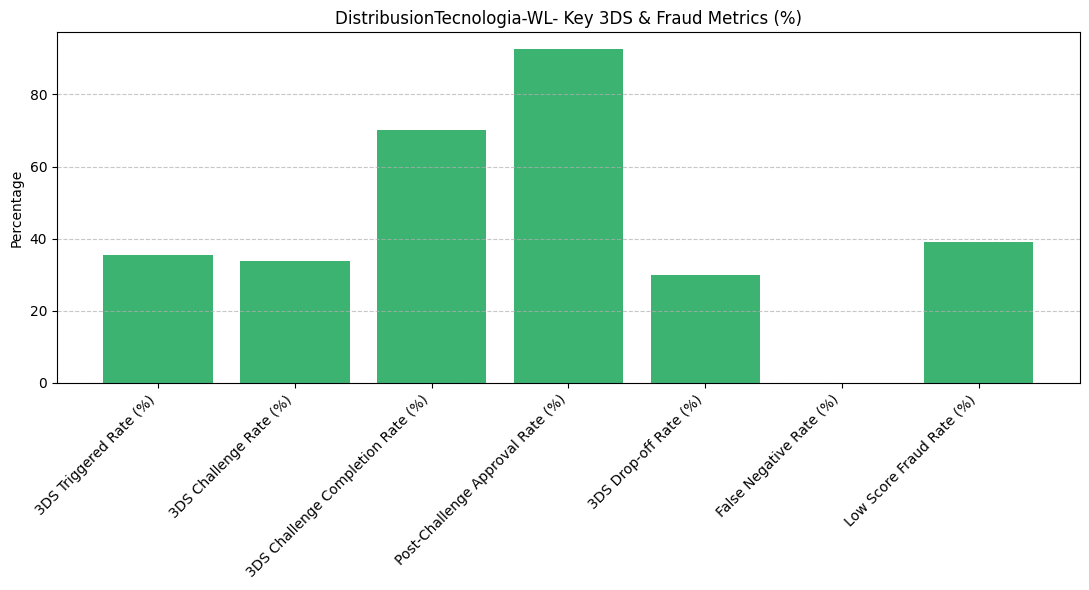

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define all percentage-based metrics including Low Score Fraud Rate
percentage_metrics = {
    "3DS Triggered Rate (%)": 35.61,
    "3DS Challenge Rate (%)": 33.91,
    "3DS Challenge Completion Rate (%)": 70.07,
    "Post-Challenge Approval Rate (%)": 92.60,
    "3DS Drop-off Rate (%)": 29.93,
    "False Negative Rate (%)": 0.11,
    "Low Score Fraud Rate (%)": 39.13
}

# Step 2: Extract labels and values
labels = list(percentage_metrics.keys())
values = list(percentage_metrics.values())

# Step 3: Create the bar graph
plt.figure(figsize=(11, 6))
plt.bar(labels, values, color='mediumseagreen')
plt.title("DistribusionTecnologia-WL- Key 3DS & Fraud Metrics (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("/content/threeds_authentication_report_2024-12-01_2025-05-31.csv")  # Replace with your actual path

# Normalize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Total transactions
total_txns = len(df)

# Treat only True as triggered
triggered_count = df['Execute_3DS_from_Request'].astype(bool).sum()

# Not triggered = total - triggered
not_triggered_count = total_txns - triggered_count

# Calculate percentages
triggered_rate = (triggered_count / total_txns) * 100
not_triggered_rate = (not_triggered_count / total_txns) * 100

# Display results
print(f"3DS Triggered Transactions: {triggered_count}")
print(f"3DS Triggered Rate: {triggered_rate:.2f}%")
print(f"3DS Not Triggered Transactions: {not_triggered_count}")
print(f"3DS Not Triggered Rate: {not_triggered_rate:.2f}%")

3DS Triggered Transactions: 143407
3DS Triggered Rate: 100.00%
3DS Not Triggered Transactions: 0
3DS Not Triggered Rate: 0.00%


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/threeds_authentication_report_2024-12-01_2025-05-31.csv")  # Update with actual path

# Normalize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Use normalized column name
col = 'Merchant_Requested_3DS'

# Standardize values
df[col] = df[col].astype(str).str.strip().str.lower()

# Count triggered and not triggered
triggered_count = (df[col] == 'true').sum()
not_triggered_count = (df[col] == 'false').sum()
total = triggered_count + not_triggered_count

# Calculate percentages
triggered_pct = (triggered_count / total) * 100 if total else 0
not_triggered_pct = (not_triggered_count / total) * 100 if total else 0

# Output results
print(f"✅ 3DS Triggered Transactions (True): {triggered_count}")
print(f"📊 3DS Triggered Rate: {triggered_pct:.2f}%")
print(f"❌ 3DS Not Triggered Transactions (False): {not_triggered_count}")
print(f"📉 3DS Not Triggered Rate: {not_triggered_pct:.2f}%")


✅ 3DS Triggered Transactions (True): 143407
📊 3DS Triggered Rate: 100.00%
❌ 3DS Not Triggered Transactions (False): 0
📉 3DS Not Triggered Rate: 0.00%


In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/threeds_authentication_report_2024-12-01_2025-05-31.csv")  # Update path as needed

# Normalize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
import pandas as pd

# Show all column names
print(df.columns.tolist())

['Original_Event_Date', 'Acquirer_Response', 'Authentication_Flow', 'Authentication_Only', 'Authentication_Success', 'Amount_EUR', 'Execute_3DS_from_Request', 'Issuer_Country', 'Merchant_Account', 'Merchant_Requested_3DS', 'Payment_Method', 'Shopper_Country', '3DS2_Redirect', '3DS_Version', '3DS_Version_from_Request']


In [ ]:
print(df['Merchant_Requested_3DS'].unique())


[ True]


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/threeds_DistribusionTecnologia-WL-localRetailer - threeds_authentication_report_2024-12-01_2025-05-31-6.csv.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Target column
col = 'Merchant_Requested_3DS'

# Convert column to lowercase strings
df[col] = df[col].astype(str).str.strip().str.lower()

# Count 'true' and 'false' explicitly
triggered_count = df[df[col] == 'true'].shape[0]
not_triggered_count = df[df[col] == 'false'].shape[0]
other_count = df[~df[col].isin(['true', 'false'])].shape[0]  # optional: count unexpected/missing values

# Total valid entries
total_valid = triggered_count + not_triggered_count

# Calculate percentages
triggered_pct = (triggered_count / total_valid) * 100 if total_valid else 0
not_triggered_pct = (not_triggered_count / total_valid) * 100 if total_valid else 0

# Output
print(f"✅ 3DS Triggered (True): {triggered_count}")
print(f"❌ 3DS Not Triggered (False): {not_triggered_count}")
print(f"📊 Triggered Rate: {triggered_pct:.2f}%")
print(f"📉 Not Triggered Rate: {not_triggered_pct:.2f}%")
print(f"⚠️ Other or Empty Values: {other_count}")



✅ 3DS Triggered (True): 94158
❌ 3DS Not Triggered (False): 177
📊 Triggered Rate: 99.81%
📉 Not Triggered Rate: 0.19%
⚠️ Other or Empty Values: 0


In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/threeds_authentication_report_2024-12-01_2025-05-31.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Column name
col = 'Merchant_Requested_3DS'

# Convert to lowercase string for comparison
df[col] = df[col].astype(str).str.strip().str.lower()

# Check if 'false' exists
has_false = (df[col] == 'false').any()

print("❌ 'False' values found in Merchant_Requested_3DS column:" if has_false else "✅ No 'False' values found.")


✅ No 'False' values found.


In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/threeds_DistribusionTecnologia-Flixbus - threeds_authentication_report_2024-12-01_2025-05-31-5.csv.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Normalize the 'Merchant_Requested_3DS' column
df['Merchant_Requested_3DS'] = df['Merchant_Requested_3DS'].astype(str).str.strip().str.lower()

# Create 3DS Triggered column using Merchant_Requested_3DS
df['ThreeDS_Triggered'] = df['Merchant_Requested_3DS'] == 'true'

# Optional: Clean Acquirer_Response
df['Acquirer_Response'] = df['Acquirer_Response'].fillna("").astype(str)

results = []

# Loop through each merchant
for merchant in df['Merchant_Account'].unique():
    sub_df = df[df['Merchant_Account'] == merchant]
    triggered_df = sub_df[sub_df['ThreeDS_Triggered'] == True]  # Only for triggered rows

    total_txns = sub_df.shape[0]
    triggered = triggered_df.shape[0]
    challenged = (triggered_df['Authentication_Flow'] == 'Challenged').sum()
    completed = ((triggered_df['Authentication_Flow'] == 'Challenged') &
                 (triggered_df['Authentication_Success'] == 1)).sum()
    approved = ((triggered_df['Authentication_Flow'] == 'Challenged') &
                (triggered_df['Authentication_Success'] == 1) &
                (triggered_df['Acquirer_Response'].str.lower() == 'approved')).sum()

    result = {
        "Merchant": merchant,
        "Total Transactions": total_txns,
        "3DS Triggered": triggered,
        "Challenged": challenged,
        "Challenge Completed": completed,
        "Challenge Approved": approved,
        "3DS Triggered Rate (%)": round((triggered / total_txns) * 100, 2) if total_txns else 0,
        "3DS Challenge Rate (%)": round((challenged / triggered) * 100, 2) if triggered else 0,
        "3DS Challenge Completion Rate (%)": round((completed / challenged) * 100, 2) if challenged else 0,
        "Post-Challenge Approval Rate (%)": round((approved / completed) * 100, 2) if completed else 0,
        "3DS Drop-off Rate (%)": round(((challenged - completed) / challenged) * 100, 2) if challenged else 0
    }
    results.append(result)

# Display summary
summary_df = pd.DataFrame(results)
print(summary_df)


                         Merchant  Total Transactions  3DS Triggered  \
0  DistribusionTecnologia-Flixbus                2017           2010   

   Challenged  Challenge Completed  Challenge Approved  \
0        1584                 1029                 948   

   3DS Triggered Rate (%)  3DS Challenge Rate (%)  \
0                   99.65                   78.81   

   3DS Challenge Completion Rate (%)  Post-Challenge Approval Rate (%)  \
0                              64.96                             92.13   

   3DS Drop-off Rate (%)  
0                  35.04  
